# VISUALIZATION FOR TESTING

In [13]:
import pickle
import numpy as np
from collections import defaultdict, Counter

def feature_summary(pkl_path="models/data/route_graphs_filtered.pkl"):
    """简洁地查看所有特征的整体情况"""
    
    with open(pkl_path, 'rb') as f:
        route_graphs = pickle.load(f)
    
    print(f"数据集: {len(route_graphs)} 个图")
    
    # 收集所有特征值
    node_features = defaultdict(list)
    edge_features = defaultdict(list)
    
    for graph_data in route_graphs:
        G = graph_data['graph']
        
        # 收集节点特征
        for node, attrs in G.nodes(data=True):
            for key, value in attrs.items():
                node_features[key].append(value)
        
        # 收集边特征  
        for u, v, attrs in G.edges(data=True):
            for key, value in attrs.items():
                edge_features[key].append(value)
    
    # 统计节点特征
    print("\n=== 节点特征 ===")
    for feature, values in node_features.items():
        if isinstance(values[0], (int, float)):
            # 数值特征
            arr = np.array(values)
            print(f"{feature}: [{arr.min():.2f}, {arr.max():.2f}], 均值={arr.mean():.2f}")
        else:
            # 分类特征
            unique_count = len(set(values))
            print(f"{feature}: {unique_count} 种取值, 如 {list(set(values))[:3]}")
    
    # 统计边特征
    print("\n=== 边特征 ===")
    for feature, values in edge_features.items():
        if isinstance(values[0], (int, float)):
            # 数值特征
            arr = np.array(values)
            print(f"{feature}: [{arr.min():.2f}, {arr.max():.2f}], 均值={arr.mean():.2f}")
        else:
            # 分类特征
            unique_count = len(set(values))
            print(f"{feature}: {unique_count} 种取值, 如 {list(set(values))[:3]}")

# 运行
feature_summary()

数据集: 1791 个图

=== 节点特征 ===
geometry: 13354 种取值, 如 [<LINESTRING (682438.827 3556899.204, 682448.178 3556850.541, 682460.965 3556...>, <LINESTRING (668757.166 3546908.346, 668782.789 3546902.134, 668784.711 3546...>, <LINESTRING (669044.964 3545666.128, 669097.262 3545647.064, 669109.626 3545...>]
length: [2.22, 65212.11], 均值=458.40
width: [6.00, 25.00], 均值=9.65
highway: 4 种取值, 如 ['street', 'secondary', 'internal']
height_mean: [0.00, 23.12], 均值=0.62
frontage_L_mean: [0.00, 150.00], 均值=1.08
transport_den: [0.00, 6.69], 均值=0.02
nvdi_mean: [0.05, 0.38], 均值=0.18
hop_level: [0.00, 1.00], 均值=0.69
is_center: [0.00, 1.00], 均值=0.06
poi_entropy: [0.00, 1.00], 均值=0.21
linearity: [0.00, 1.00], 均值=0.94
geom_vertex_count: [2.00, 289.00], 均值=9.77

=== 边特征 ===
intersection_coords: 10698 种取值, 如 [(1.3981266969951822, -1.0289125691328502), (-1.2771781990378985, -0.3436414677725141), (0.17819448987996506, 0.5361784967598396)]


In [14]:
import pickle
import numpy as np
from collections import defaultdict

def center_nodes_summary(pkl_path="models/data/route_graphs_filtered.pkl"):
    """查看is_center为True的节点特征概览"""
    
    with open(pkl_path, 'rb') as f:
        route_graphs = pickle.load(f)
    
    # 收集所有center节点的特征
    center_features = defaultdict(list)
    center_count = 0
    total_nodes = 0
    
    for graph_data in route_graphs:
        G = graph_data['graph']
        
        for node, attrs in G.nodes(data=True):
            total_nodes += 1
            
            # 只统计is_center为True的节点
            if attrs.get('is_center', False):
                center_count += 1
                for key, value in attrs.items():
                    center_features[key].append(value)
    
    print(f"数据集: {len(route_graphs)} 个图")
    print(f"总节点数: {total_nodes}")
    print(f"中心节点数: {center_count}")
    print(f"中心节点占比: {center_count/total_nodes:.1%}")
    
    print(f"\n=== 中心节点特征概览 ===")
    
    for feature, values in center_features.items():
        if not values:  # 防止空列表
            continue
            
        if isinstance(values[0], (int, float)):
            # 数值特征统计
            arr = np.array(values)
            print(f"{feature}:")
            print(f"  范围: [{arr.min():.2f}, {arr.max():.2f}]")
            print(f"  均值: {arr.mean():.2f} ± {arr.std():.2f}")
            
        elif isinstance(values[0], bool):
            # 布尔特征
            true_count = sum(values)
            print(f"{feature}: {true_count}/{len(values)} = {true_count/len(values):.1%} 为True")
            
        else:
            # 分类特征
            unique_values = list(set(values))
            print(f"{feature}: {len(unique_values)} 种取值")
            if len(unique_values) <= 5:
                print(f"  取值: {unique_values}")
            else:
                print(f"  示例: {unique_values[:5]}...")

# 运行
center_nodes_summary()

数据集: 1791 个图
总节点数: 30653
中心节点数: 1791
中心节点占比: 5.8%

=== 中心节点特征概览 ===
geometry: 1791 种取值
  示例: [<LINESTRING (680419.718 3553220.613, 680440.322 3553228.728, 680478.652 3553...>, <LINESTRING (652822.142 3548146.345, 652902.124 3548224.011, 652924.427 3548...>, <LINESTRING (664272.478 3564305.209, 664268.477 3564319.556, 664264.496 3564...>, <LINESTRING (681030.535 3535850.319, 681076.257 3535830.028)>, <LINESTRING (656258.661 3546396.249, 656312.442 3546392.523)>]...
length:
  范围: [30.14, 498.04]
  均值: 192.28 ± 123.19
width:
  范围: [6.00, 25.00]
  均值: 7.14 ± 2.47
highway: 1 种取值
  取值: ['street']
height_mean:
  范围: [0.01, 2.60]
  均值: 0.26 ± 0.28
frontage_L_mean:
  范围: [0.00, 20.07]
  均值: 0.50 ± 0.96
transport_den:
  范围: [0.00, 0.31]
  均值: 0.01 ± 0.02
nvdi_mean:
  范围: [0.05, 0.37]
  均值: 0.19 ± 0.06
hop_level:
  范围: [0.00, 0.00]
  均值: 0.00 ± 0.00
is_center:
  范围: [1.00, 1.00]
  均值: 1.00 ± 0.00
poi_entropy:
  范围: [-0.00, 0.97]
  均值: 0.17 ± 0.26
linearity:
  范围: [0.00, 1.00]
  均值: 0.94 ± 0.14
ge

# Figure 3 绘制

Saved: feature_visualization.svg


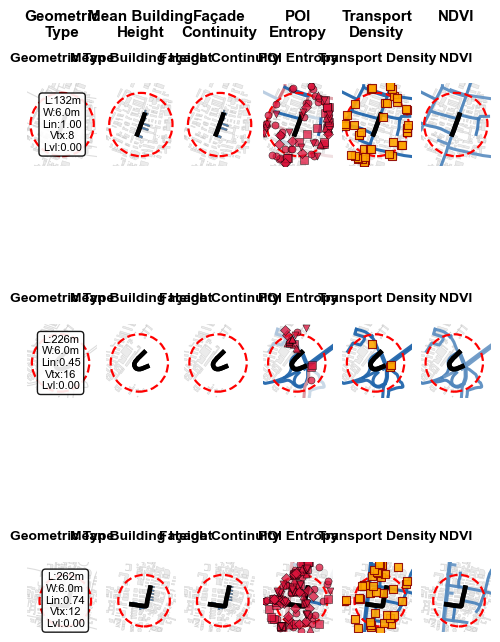

In [19]:
# 改进版：放大可视范围，同时将“道路类特征”(POI entropy / Transport density / NDVI)
# 在同一图内为周边所有道路按其各自的特征值着色（中心道路加粗叠放）
import pickle
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import matplotlib
matplotlib.rcParams['font.sans-serif'] = ['Arial', 'DejaVu Sans']
matplotlib.rcParams['axes.unicode_minus'] = False

DATA_DIR = "data_for_test/meters_data"
PKL_PATH = "models/data/route_graphs_filtered.pkl"
OUTPUT_PATH = "feature_visualization.svg"
FIG_WIDTH_CM = 12      # 固定 12cm 宽
ROW_HEIGHT_CM = 6.0    # 每行高度增大，避免“地图太小”
DPI = 300
BUFFER_M = 200         # 放大周边显示范围（原100 → 200）

cmap_bwr = LinearSegmentedColormap.from_list('bwr', ['#2166ac', '#f7f7f7', '#b2182b'], N=256)

def load_data():
    roads = gpd.read_file(f'{DATA_DIR}/fixed_roads.shp')
    roads['rid'] = np.arange(len(roads))
    buildings = gpd.read_file(f'{DATA_DIR}/building_meters.shp')
    pois = gpd.read_file(f'{DATA_DIR}/poi_meters.shp')
    with open(PKL_PATH, 'rb') as f:
        graphs = pickle.load(f)
    return roads, buildings, pois, graphs

def normalize(x, lo, hi):
    if hi == lo: return 0.5
    return float(np.clip((x - lo) / (hi - lo), 0, 1))

def sindex_subset(gdf, geom, radius):
    if gdf.empty: return gdf
    buf = geom.buffer(radius)
    try:
        idx = list(gdf.sindex.intersection(buf.bounds))
        cand = gdf.iloc[idx]
        return cand[cand.intersects(buf)]
    except Exception:
        return gdf[gdf.intersects(buf)]

def draw_context(ax, center_geom, roads, buildings, radius=BUFFER_M, draw_roads=False):
    """周边底图：浅灰建筑、（可选）浅灰道路、红虚线圈、中心道路加粗"""
    buf = center_geom.buffer(radius)
    roads_in = sindex_subset(roads, center_geom, radius)
    blds_in = sindex_subset(buildings, center_geom, radius)
    if len(blds_in) > 0:
        blds_in.plot(ax=ax, facecolor="#e6e6e6", edgecolor="#c7c7c7", linewidth=0.3, alpha=0.8, zorder=1)
    if draw_roads and len(roads_in) > 0:
        roads_in.plot(ax=ax, color="#cfcfcf", linewidth=0.8, alpha=0.7, zorder=2)

    # 中心道路（黑色）
    ax.plot(*center_geom.xy, color="black", linewidth=3.2, alpha=1.0, zorder=5)

    circ = plt.Circle((center_geom.centroid.x, center_geom.centroid.y), radius,
                      fill=False, edgecolor='red', linewidth=1.6, linestyle='--', zorder=6)
    ax.add_patch(circ)

    minx, miny, maxx, maxy = buf.bounds
    ax.set_xlim(minx, maxx); ax.set_ylim(miny, maxy)
    ax.set_aspect('equal'); ax.axis('off')
    return ax

def node_geom(nid, attrs, roads):
    """优先取节点自带 geometry；否则按 rid 从 roads 找"""
    geom = attrs.get('geometry')
    if geom is not None: return geom
    rid = attrs.get('rid', nid)
    row = roads[roads['rid'] == rid]
    return None if row.empty else row.iloc[0].geometry

def color_roads_by_feature(ax, G, roads, center_geom, attr, vmin, vmax, cmap=cmap_bwr, radius=BUFFER_M):
    """在周边范围内，按各自特征值给所有道路上色；中心道路最后加粗覆盖"""
    buf = center_geom.buffer(radius)
    for nid, attrs in G.nodes(data=True):
        geom = node_geom(nid, attrs, roads)
        if geom is None or not geom.intersects(buf): 
            continue
        val = float(attrs.get(attr, 0) or 0)
        ax.plot(*geom.xy, color=cmap(normalize(val, vmin, vmax)), linewidth=2.2, alpha=0.95, zorder=4)
    # 中心道路置顶
    ax.plot(*center_geom.xy, color="black", linewidth=3.4, alpha=1.0, zorder=6)

def col_geometric(ax, center_node, center_geom, roads, buildings):
    draw_context(ax, center_geom, roads, buildings, draw_roads=True)
    # 数值卡片
    length = float(center_node.get('length', 0) or 0)
    width  = float(center_node.get('width', 0) or 0)
    lin    = float(center_node.get('linearity', center_node.get('geom_linearity', 0)) or 0)
    vtx    = float(center_node.get('geom_vertex_count', 0) or 0)
    lvl    = float(center_node.get('hop_level', 0) or 0)
    c = center_geom.centroid
    ax.text(c.x, c.y, f"L:{length:.0f}m\nW:{width:.1f}m\nLin:{lin:.2f}\nVtx:{vtx:.0f}\nLvl:{lvl:.2f}",
            fontsize=8, ha='center', va='center', bbox=dict(boxstyle='round', fc='white', alpha=0.9), zorder=10)
    ax.set_title('Geometric Type', fontsize=10, fontweight='bold'); return ax

def col_bld_feat(ax, center_node, center_geom, roads, buildings, key, title, rng):
    draw_context(ax, center_geom, roads, buildings)
    # 用该条道路的值着色其“周边建筑”（按道路宽度生成 buffer）
    width = float(center_node.get('width', 10.0) or 10.0)
    blds_near = sindex_subset(buildings, center_geom, radius=width*2.0)
    val = float(center_node.get(key, 0) or 0)
    if len(blds_near) > 0:
        blds_near.plot(ax=ax, facecolor=cmap_bwr(normalize(val, *rng)), edgecolor='#666',
                       linewidth=0.4, alpha=0.78, zorder=3)
    ax.plot(*center_geom.xy, color="black", linewidth=3.2, zorder=5)
    ax.set_title(title, fontsize=10, fontweight='bold'); return ax

def col_poi(ax, center_node, center_geom, roads, buildings, pois, G):
    draw_context(ax, center_geom, roads, buildings)
    color_roads_by_feature(ax, G, roads, center_geom, 'poi_entropy', 0, 1, cmap_bwr)
    # 叠加 POI 点
    poi_near = sindex_subset(pois, center_geom, radius=BUFFER_M)
    if len(poi_near) > 0:
        type_col = 'type' if 'type' in poi_near.columns else ('poi_type' if 'poi_type' in poi_near.columns else None)
        if type_col:
            mk = ['o','s','^','D','v']
            for i, t in enumerate(poi_near[type_col].astype(str).fillna('NA').unique()[:5]):
                poi_near[poi_near[type_col].astype(str)==t].plot(ax=ax, marker=mk[i%len(mk)],
                    markersize=26, color='crimson', alpha=0.75, edgecolor='black', linewidth=0.4, zorder=7)
        else:
            poi_near.plot(ax=ax, marker='o', markersize=26, color='crimson', alpha=0.75,
                          edgecolor='black', linewidth=0.4, zorder=7)
    ax.set_title('POI Entropy', fontsize=10, fontweight='bold'); return ax

def col_transport(ax, center_node, center_geom, roads, buildings, pois, G):
    draw_context(ax, center_geom, roads, buildings)
    color_roads_by_feature(ax, G, roads, center_geom, 'transport_den', 0, 7, cmap_bwr)
    near = sindex_subset(pois, center_geom, radius=BUFFER_M)
    if 'type' in near.columns:
        keys = ['transport','bus','metro','station','交通','公交','地铁']
        near = near[near['type'].astype(str).str.contains('|'.join(keys), case=False, na=False)]
    if len(near) > 0:
        near.plot(ax=ax, marker='s', markersize=34, color='orange', alpha=0.9,
                  edgecolor='darkred', linewidth=0.8, zorder=7)
    ax.set_title('Transport Density', fontsize=10, fontweight='bold'); return ax

def col_ndvi(ax, center_node, center_geom, roads, buildings, G):
    draw_context(ax, center_geom, roads, buildings)
    color_roads_by_feature(ax, G, roads, center_geom, 'nvdi_mean', 0, 1, cmap_bwr)
    ax.set_title('NDVI', fontsize=10, fontweight='bold'); return ax

def pick_samples(graphs, n=3):
    pairs = []
    for g in graphs:
        G = g['graph']
        cn = next(((nid, a) for nid,a in G.nodes(data=True) if a.get('is_center', False)), None)
        if cn: pairs.append((float(cn[1].get('poi_entropy', 0) or 0), g))
    if not pairs: return []
    pairs.sort(key=lambda x: x[0]); idxs = [0, len(pairs)//2, -1][:n]
    return [pairs[i][1] for i in idxs]

def create_figure(samples, roads, buildings, pois):
    n_rows, n_cols = len(samples), 6
    fig_w_in = FIG_WIDTH_CM / 2.54
    fig_h_in = max(ROW_HEIGHT_CM * n_rows, 5) / 2.54   # 行高更大 → 地图视觉更大
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(fig_w_in, fig_h_in), constrained_layout=True)
    if n_rows == 1: axes = axes.reshape(1, -1)

    for r, gdata in enumerate(samples):
        G = gdata['graph']
        center = next((a for _,a in G.nodes(data=True) if a.get('is_center', False)), None)
        if center is None: continue
        geom = node_geom(center.get('rid', None), center, roads)
        if geom is None: continue

        col_geometric(axes[r,0], center, geom, roads, buildings)
        col_bld_feat(axes[r,1], center, geom, roads, buildings, 'height_mean', 'Mean Building Height', (0,25))
        col_bld_feat(axes[r,2], center, geom, roads, buildings, 'frontage_L_mean', 'Façade Continuity', (0,150))
        col_poi(axes[r,3], center, geom, roads, buildings, pois, G)
        col_transport(axes[r,4], center, geom, roads, buildings, pois, G)
        col_ndvi(axes[r,5], center, geom, roads, buildings, G)

    # 顶部列标题
    titles = ['Geometric\nType','Mean Building\nHeight','Façade\nContinuity','POI\nEntropy','Transport\nDensity','NDVI']
    for i, t in enumerate(titles):
        plt.gcf().text((i+0.5)/n_cols, 0.995, t, ha='center', va='top', fontsize=11, fontweight='bold')

    plt.savefig(OUTPUT_PATH, format='svg', dpi=DPI, bbox_inches='tight')
    print(f"Saved: {OUTPUT_PATH}")
    return plt.gcf()

def main():
    roads, buildings, pois, graphs = load_data()
    samples = pick_samples(graphs, n=3)  # 可改4
    if not samples:
        print("No valid samples."); return
    fig = create_figure(samples, roads, buildings, pois)
    plt.show()

if __name__ == "__main__":
    main()